In [26]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import display, Markdown

# siehe Hilfscode.py
from Hilfscode import draw_piechart
from Hilfscode import cat_compare
from Hilfscode import lorenz

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import KFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

from sklearn import preprocessing

In [27]:
params = {
    "random_state" : 0,
    "max_iter" : 500
}

In [28]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [29]:
app_test = pd.read_csv(DATASET_DIR / "application_test.csv")
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")

description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [30]:
# app_train["TARGET"].replace(
#     {
#         0: "Payback",
#         1: "Default"
#     }, inplace = True
# )

In [31]:
payback = app_train[app_train["TARGET"] == "Payback"]
default = app_train[app_train["TARGET"] == "Default"]

In [32]:
head = ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]

In [33]:
app_train[head+ ["TARGET"]].head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
0,0.083037,0.262949,0.139376,1
1,0.311267,0.622246,NaN,0
2,NaN,0.555912,0.729567,0
3,NaN,0.650442,NaN,0
4,NaN,0.322738,NaN,0


In [34]:
len(app_train)

307511

In [35]:
X = app_train[head + ["TARGET"]]
X = X.dropna()

In [36]:
y = X["TARGET"]
x = X.drop(["TARGET"], axis=1)

In [37]:
x.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.083037,0.262949,0.139376
6,0.774761,0.724000,0.492060
8,0.587334,0.205747,0.751724
10,0.319760,0.651862,0.363945
11,0.722044,0.555183,0.652897


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
reg = LogisticRegression().fit(x, y)

In [40]:
len(x.columns)

3

In [41]:
n = len(X)
p = len(x.columns)

r2 = reg.score(x, y)
r2_adj = 1-(1-r2)*(n-1)/(n-p-1)

print(r2)
print(r2_adj)
print(p)
print(n)

0.927054722645521
0.9270527256949159
3
109589


In [42]:
features = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'AMT_CREDIT', 'NAME_INCOME_TYPE', 'DAYS_ID_PUBLISH', 'FLAG_DOCUMENT_3', 'LIVINGAREA_AVG', 'REGION_RATING_CLIENT', 'APARTMENTS_AVG', 'REG_CITY_NOT_WORK_CITY', 'AMT_ANNUITY', 'FLAG_EMP_PHONE', 'DAYS_REGISTRATION', 'OCCUPATION_TYPE', 'FLOORSMAX_AVG', 'OWN_CAR_AGE', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE', 'YEARS_BEGINEXPLUATATION_AVG', 'ORGANIZATION_TYPE', 'REG_CITY_NOT_LIVE_CITY', 'ELEVATORS_AVG', 'HOUR_APPR_PROCESS_START', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'DEF_30_CNT_SOCIAL_CIRCLE', 'BASEMENTAREA_AVG', 'DEF_60_CNT_SOCIAL_CIRCLE', 'ENTRANCES_AVG', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'LANDAREA_AVG', 'YEARS_BUILD_AVG', 'LIVINGAPARTMENTS_AVG', 'CNT_FAM_MEMBERS', 'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'CNT_CHILDREN', 'COMMONAREA_AVG', 'NONLIVINGAREA_AVG', 'AMT_REQ_CREDIT_BUREAU_QRT', 'NAME_FAMILY_STATUS', 'NONLIVINGAPARTMENTS_AVG', 'EMERGENCYSTATE_MODE', 'HOUSETYPE_MODE', 'FLOORSMIN_AVG', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'FLAG_WORK_PHONE', 'NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE', 'LIVE_CITY_NOT_WORK_CITY', 'AMT_REQ_CREDIT_BUREAU_MON', 'WALLSMATERIAL_MODE', 'WEEKDAY_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_DAY', 'FLAG_PHONE', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FONDKAPREMONT_MODE', 'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_5', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_15', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_9', 'FLAG_EMAIL', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_13', 'FLAG_MOBIL', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12']

In [43]:
m_heads = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [44]:
heads = [head for head in features if head in m_heads]
heads

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'EXT_SOURCE_1',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_GOODS_PRICE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_CREDIT',
 'DAYS_ID_PUBLISH',
 'LIVINGAREA_AVG',
 'APARTMENTS_AVG',
 'AMT_ANNUITY',
 'DAYS_REGISTRATION',
 'FLOORSMAX_AVG',
 'OWN_CAR_AGE',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'HOUR_APPR_PROCESS_START',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'BASEMENTAREA_AVG',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ENTRANCES_AVG',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'LANDAREA_AVG',
 'YEARS_BUILD_AVG',
 'LIVINGAPARTMENTS_AVG',
 'CNT_FAM_MEMBERS',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'CNT_CHILDREN',
 'COMMONAREA_AVG',
 'NONLIVINGAREA_AVG',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'NONLIVINGAPARTMENTS_AVG',
 'FLOORSMIN_AVG',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR']

In [45]:
data = {
        "auc":[],
        "auc_adj":[],
        "p" : [],
        "n": []
       }

for t in range(len(heads)):
    X = app_train[heads[:t+1] + ["TARGET"]]
    X = X.dropna()
    y = X["TARGET"]
    x = X.drop(["TARGET"], axis=1)
    scaler = preprocessing.StandardScaler().fit(x)
    x = scaler.transform(x)
    model = LogisticRegression(**params).fit(x, y)
    n = len(X)
    p = len(X.columns)
    
    # unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)
    
    x_test_prob = model.predict_proba(x_test)
    # Erstellung der AUC & ROC-Metrik
    # Wahrscheinlichkeiten für keinen Kreditausfall
    prob = x_test_prob[:,1]
    auc = roc_auc_score(y_test, prob)
    auc_adj = 1-(1-auc)*(n-1)/(n-p-1)

    data["auc"].append(auc)
    data["auc_adj"].append(auc_adj)
    data["p"].append(p)
    data["n"].append(n)

In [46]:
df = pd.DataFrame(data)
df

,auc,auc_adj,p,n
0,0.659050,0.659048,2,306851
1,0.719542,0.719539,3,246116
2,0.741376,0.741367,4,109589
3,0.743681,0.743669,5,109589
4,0.743902,0.743888,6,109589
5,0.748869,0.748853,7,109490
6,0.748912,0.748894,8,109490
7,0.752717,0.752697,9,109490
8,0.753063,0.753041,10,109490
9,0.754322,0.754275,11,57460


         auc  auc_adj   p      n
18  0.778574  0.77834  20  18959


<AxesSubplot:>

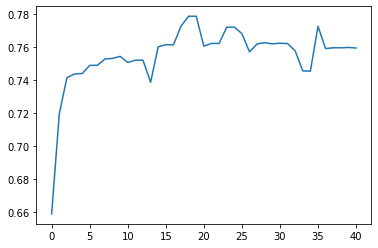

In [47]:
print(df[df["auc"] == df["auc"].max()])
df["auc"].plot()

         auc  auc_adj   p      n
18  0.778574  0.77834  20  18959


<AxesSubplot:>

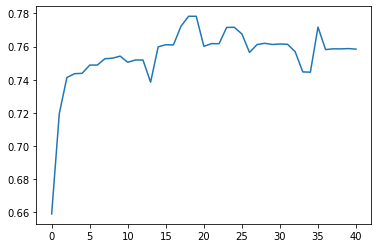

In [48]:
print(df[df["auc_adj"] == df["auc_adj"].max()])
df["auc_adj"].plot()

In [49]:
y = app_train["TARGET"]
x = app_train[heads]

In [50]:
# ersätzt alle np.nan durch 0
x = x.fillna(0)

# unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

# logistisches Regressionsmodell
model = LogisticRegression(**params)

aucs = []

kfold = KFold(5, True, 1)
data = x

# enumerate splits
for i, (train, test) in enumerate(kfold.split(data)):
    model.fit(x.loc[train], y.loc[train])
    
    # Prognosewerte der Testdaten in %
    x_test_prob = model.predict_proba(x.loc[test])

    # Erstellung der AUC & ROC-Metrik
    # Wahrscheinlichkeiten für keinen Kreditausfall
    prob = x_test_prob[:,1]
    auc = roc_auc_score(y.loc[test], prob)
    aucs.append(auc)
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


train: [     0      2      3 ... 307508 307509 307510], test: [     1      4      6 ... 307493 307495 307501], auc: 0.6261290133029263
train: [     0      1      2 ... 307508 307509 307510], test: [     3     18     22 ... 307499 307503 307504], auc: 0.6242306750866855
train: [     0      1      2 ... 307508 307509 307510], test: [     9     10     15 ... 307489 307492 307502], auc: 0.6161477411477411
train: [     0      1      2 ... 307506 307507 307508], test: [    12     16     23 ... 307505 307509 307510], auc: 0.6226457986712526
train: [     1      3      4 ... 307505 307509 307510], test: [     0      2      5 ... 307506 307507 307508], auc: 0.6211608529283854


Durchschnitt: 0.62
Standardabw.: 0.00
Varianz:      0.00


In [64]:
data.iloc[:,0:18].head()

,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,DAYS_BIRTH,DAYS_EMPLOYED,AMT_GOODS_PRICE,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,DAYS_ID_PUBLISH,LIVINGAREA_AVG,APARTMENTS_AVG,AMT_ANNUITY,DAYS_REGISTRATION,FLOORSMAX_AVG,OWN_CAR_AGE,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,YEARS_BEGINEXPLUATATION_AVG
0,0.262949,0.139376,0.083037,-9461,-637,351000.0,-1134.0,406597.5,-2120,0.0190,0.0247,24700.5,-3648.0,0.0833,0.0,202500.0,0.018801,0.9722
1,0.622246,0.000000,0.311267,-16765,-1188,1129500.0,-828.0,1293502.5,-291,0.0549,0.0959,35698.5,-1186.0,0.2917,0.0,270000.0,0.003541,0.9851
2,0.555912,0.729567,0.000000,-19046,-225,135000.0,-815.0,135000.0,-2531,0.0000,0.0000,6750.0,-4260.0,0.0000,26.0,67500.0,0.010032,0.0000
3,0.650442,0.000000,0.000000,-19005,-3039,297000.0,-617.0,312682.5,-2437,0.0000,0.0000,29686.5,-9833.0,0.0000,0.0,135000.0,0.008019,0.0000
4,0.322738,0.000000,0.000000,-19932,-3038,513000.0,-1106.0,513000.0,-3458,0.0000,0.0000,21865.5,-4311.0,0.0000,0.0,121500.0,0.028663,0.0000


In [ ]:
# ersätzt alle np.nan durch 0
x = x.fillna(0)

# unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

# logistisches Regressionsmodell
model = LogisticRegression(**params)

aucs = []

kfold = KFold(5, True, 1)
data = x

# enumerate splits
for i, (train, test) in enumerate(kfold.split(data)):
    model.fit(x.loc[train], y.loc[train])
    
    # Prognosewerte der Testdaten in %
    x_test_prob = model.predict_proba(x.loc[test])

    # Erstellung der AUC & ROC-Metrik
    # Wahrscheinlichkeiten für keinen Kreditausfall
    prob = x_test_prob[:,1]
    auc = roc_auc_score(y.loc[test], prob)
    aucs.append(auc)
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

#### Stammdaten + Bureaudaten

In [ ]:
bureau = pd.read_csv(DATASET_DIR / "bureau.csv")

In [ ]:
m_heads = [head for head in bureau.columns if bureau[head].dtype.name != "object"]
n_heads = [head for head in bureau.columns if bureau[head].dtype.name == "object"]

In [ ]:
keys = ["SK_ID_CURR", "SK_ID_BUREAU"]
m_heads = [element for element in m_heads if element not in keys]

In [ ]:
quants = [0, 0.25, 0.5, 0.75, 1]

for index, head in enumerate(m_heads):
    
    df = bureau[["SK_ID_CURR", head]]
    df = df.groupby(by = ["SK_ID_CURR"]).quantile(quants)
    df = df.unstack(level=-1)
    
    try:
        mets = mets.join(df , on = "SK_ID_CURR")
    except (ValueError, NameError):
        mets = df

In [ ]:
mets.head()

In [ ]:
heads = list(mets.columns)

In [ ]:
bureau = pd.merge(mets, app_train[["SK_ID_CURR","TARGET"]], on="SK_ID_CURR")

In [ ]:
t = bureau.drop(["SK_ID_CURR"], axis=1)

In [ ]:
t.head()

In [ ]:
df = t

data = {
        "auc":[],
        "auc_adj":[],
        "p" : [],
        "n": []
       }

for q in range(len(heads)):
    X = df[heads[:q+1] + ["TARGET"]]
    X = X.dropna()
    y = X["TARGET"]
    x = X.drop(["TARGET"], axis=1)
    scaler = preprocessing.StandardScaler().fit(x)
    x = scaler.transform(x)
    model = LogisticRegression(**params).fit(x, y)
    n = len(X)
    p = len(X.columns)
    
    # unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)
    
    x_test_prob = model.predict_proba(x_test)
    # Erstellung der AUC & ROC-Metrik
    # Wahrscheinlichkeiten für keinen Kreditausfall
    prob = x_test_prob[:,1]
    auc = roc_auc_score(y_test, prob)
    auc_adj = 1-(1-auc)*(n-1)/(n-p-1)

    data["auc"].append(auc)
    data["auc_adj"].append(auc_adj)
    data["p"].append(p)
    data["n"].append(n)

In [ ]:
df = pd.DataFrame(data)
df

In [ ]:
print(df[df["auc"] == df["auc"].max()])
df["auc"].plot()

In [ ]:
print(df[df["auc_adj"] == df["auc_adj"].max()])
df["auc_adj"].plot()

In [ ]:
y = t["TARGET"]
x = t.drop(["TARGET"], axis=1)

In [ ]:
# ersätzt alle np.nan durch 0
x = x.fillna(0)


# unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

# logistisches Regressionsmodell
model = LogisticRegression(random_state=0)

aucs = []

kfold = KFold(5, True, 1)
data = x

# enumerate splits
for i, (train, test) in enumerate(kfold.split(data)):
    model.fit(x.loc[train], y.loc[train])
    
    # Prognosewerte der Testdaten in %
    x_test_prob = model.predict_proba(x.loc[test])

    # Erstellung der AUC & ROC-Metrik
    # Wahrscheinlichkeiten für keinen Kreditausfall
    prob = x_test_prob[:,1]
    auc = roc_auc_score(y.loc[test], prob)
    aucs.append(auc)
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

### Application Train & Bureau

In [ ]:
bureau.head()

In [ ]:
m_heads = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [ ]:
m = app_train[["SK_ID_CURR","TARGET"] + m_heads]

In [ ]:
len(m)

In [ ]:
bureau.head()

In [ ]:
bureau = bureau.drop(["TARGET"], axis=1)

In [ ]:
t = m.merge(bureau, on="SK_ID_CURR")

In [ ]:
t = t.drop(["SK_ID_CURR"], axis=1)

In [ ]:
t.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
y = t["TARGET"]
x = t.drop(["TARGET"], axis=1)

# ersätzt alle np.nan durch 0
x = x.fillna(0)


# unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

model = RandomForestClassifier(random_state=0)
#model = RandomForestClassifier(max_depth=20, random_state=0)

model.fit(x,y)

In [ ]:
# Koeffizienten der einzelnen Klassen
coef_dict = {}
for coef, feat in zip(model.feature_importances_, x.columns.values):
    coef_dict[feat] = coef
    
# Feature Importance
d = dict(sorted(coef_dict.items(), key=lambda item: item[1], reverse=True))

In [ ]:
heads = list(d.keys())

In [ ]:
df = t

data = {
        "auc":[],
        "auc_adj":[],
        "p" : [],
        "n": []
       }

for q in range(len(heads)):
    X = df[heads[:q+1] + ["TARGET"]]
    X = X.dropna()
    y = X["TARGET"]
    x = X.drop(["TARGET"], axis=1)
    scaler = preprocessing.StandardScaler().fit(x)
    x = scaler.transform(x)
    model = LogisticRegression(random_state=0).fit(x, y)
    n = len(X)
    p = len(X.columns)
    
    # unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)
    
    x_test_prob = model.predict_proba(x_test)
    # Erstellung der AUC & ROC-Metrik
    # Wahrscheinlichkeiten für keinen Kreditausfall
    prob = x_test_prob[:,1]
    auc = roc_auc_score(y_test, prob)
    auc_adj = 1-(1-auc)*(n-1)/(n-p-1)

    data["auc"].append(auc)
    data["auc_adj"].append(auc_adj)
    data["p"].append(p)
    data["n"].append(n)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
print(df[df["auc"] == df["auc"].max()])
df["auc"].plot()

In [ ]:
print(df[df["auc_adj"] == df["auc_adj"].max()])
df["auc_adj"].plot()

In [ ]:
df

In [ ]:
t.head()

In [ ]:
y = t["TARGET"]
x = t.drop(["TARGET"], axis=1)

In [ ]:
# ersätzt alle np.nan durch 0
x = x.fillna(0)

# unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

# logistisches Regressionsmodell
model = LogisticRegression(random_state=0)

aucs = []

kfold = KFold(5, True, 1)
data = x

# enumerate splits
for i, (train, test) in enumerate(kfold.split(data)):
    model.fit(x.loc[train], y.loc[train])
    
    # Prognosewerte der Testdaten in %
    x_test_prob = model.predict_proba(x.loc[test])

    # Erstellung der AUC & ROC-Metrik
    # Wahrscheinlichkeiten für keinen Kreditausfall
    prob = x_test_prob[:,1]
    auc = roc_auc_score(y.loc[test], prob)
    aucs.append(auc)
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

In [ ]:
t.head()

In [ ]:
heads = list(d.keys())

In [ ]:
temp = 0
h = []

df = t

data = {
        "auc":[],
        "auc_adj":[],
        "p" : [],
        "n": []
       }

for head in heads:
    h.append(head)
    X = df[h + ["TARGET"]]
    X = X.dropna()
    y = X["TARGET"]
    x = X.drop(["TARGET"], axis=1)
    scaler = preprocessing.StandardScaler().fit(x)
    x = scaler.transform(x)
    model = LogisticRegression(random_state=0).fit(x, y)
    n = len(X)
    p = len(X.columns)
    
    # unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)
    
    x_test_prob = model.predict_proba(x_test)
    # Erstellung der AUC & ROC-Metrik
    # Wahrscheinlichkeiten für keinen Kreditausfall
    prob = x_test_prob[:,1]
    auc = roc_auc_score(y_test, prob)
    auc_adj = 1-(1-auc)*(n-1)/(n-p-1)

    if auc_adj > temp:

        data["auc"].append(auc)
        data["auc_adj"].append(auc_adj)
        data["p"].append(p)
        data["n"].append(n)
        
        temp = auc_adj
    
    else:
        h.remove(head)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
print(df[df["auc"] == df["auc"].max()])
df["auc"].plot()

In [ ]:
print(df[df["auc_adj"] == df["auc_adj"].max()])
df["auc_adj"].plot()

In [ ]:
df

In [ ]:
h

In [ ]:
t = t[["TARGET"] + h]

In [ ]:
y = t["TARGET"]
x = t.drop(["TARGET"], axis=1)

In [ ]:
# ersätzt alle np.nan durch 0
x = x.fillna(0)

# unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

# logistisches Regressionsmodell
model = LogisticRegression(random_state=0)

aucs = []

kfold = KFold(5, True, 1)
data = x

# enumerate splits
for i, (train, test) in enumerate(kfold.split(data)):
    model.fit(x.loc[train], y.loc[train])
    
    # Prognosewerte der Testdaten in %
    x_test_prob = model.predict_proba(x.loc[test])

    # Erstellung der AUC & ROC-Metrik
    # Wahrscheinlichkeiten für keinen Kreditausfall
    prob = x_test_prob[:,1]
    auc = roc_auc_score(y.loc[test], prob)
    aucs.append(auc)
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))